In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import baytune as btb

In [3]:
data = pd.read_csv("D:\MessingWithJS\py4e\california_house_pred\housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#predicting median_house_value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
data.columns = [columns.strip() for columns in data.columns]

In [10]:
X = data.drop(["median_house_value"], axis = 1)
y = data["median_house_value"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15018,-117.03,32.78,17.0,5481.0,1618.0,2957.0,1537.0,2.5707,<1H OCEAN,171300.0
3015,-119.16,34.95,14.0,4054.0,787.0,1581.0,579.0,3.0882,INLAND,148200.0
13026,-121.21,38.67,11.0,5500.0,956.0,2827.0,946.0,4.1071,INLAND,145800.0
19272,-122.76,38.44,11.0,2895.0,524.0,1633.0,534.0,4.7283,<1H OCEAN,170200.0
17405,-120.45,34.95,7.0,1479.0,532.0,1057.0,459.0,2.2538,<1H OCEAN,162500.0
...,...,...,...,...,...,...,...,...,...,...
1460,-121.99,37.97,22.0,2823.0,509.0,1271.0,474.0,5.1333,INLAND,207200.0
4155,-118.20,34.11,52.0,1901.0,525.0,1856.0,480.0,3.0000,<1H OCEAN,156400.0
13906,-116.47,34.07,22.0,5473.0,1234.0,2581.0,1098.0,1.9375,INLAND,65300.0
10358,-117.67,33.60,20.0,1213.0,171.0,565.0,170.0,7.2592,<1H OCEAN,314800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

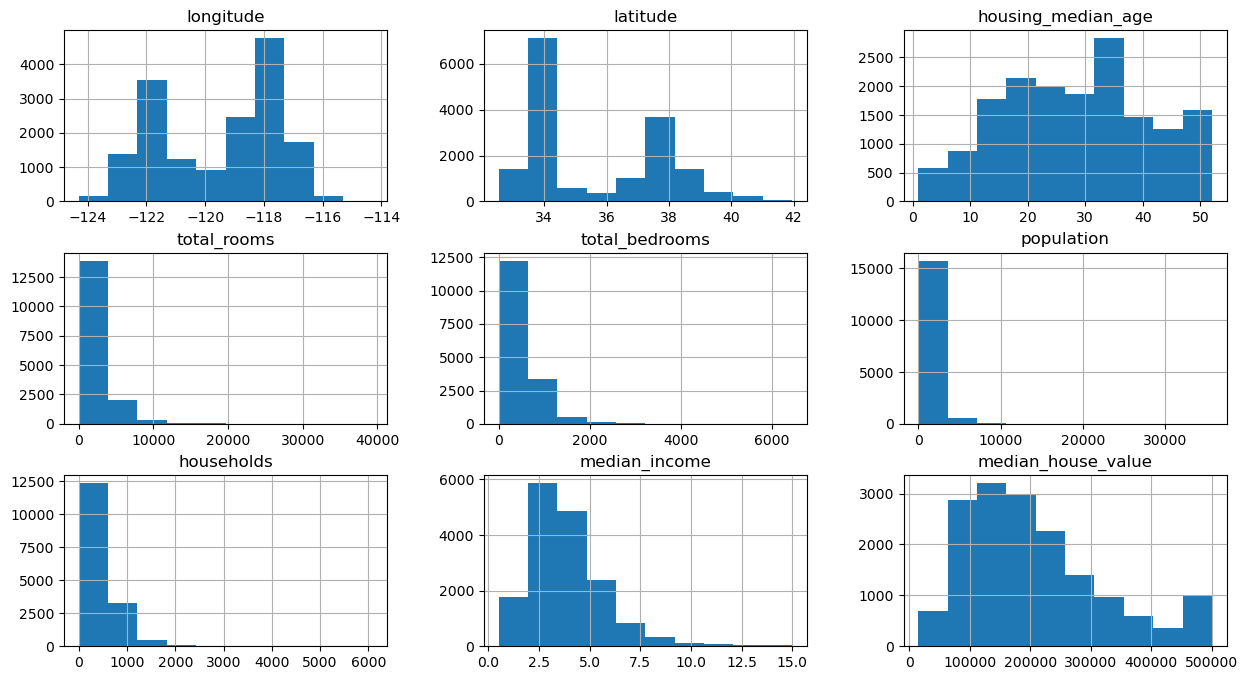

In [14]:
train_data.hist(figsize=(15, 8))

<Axes: >

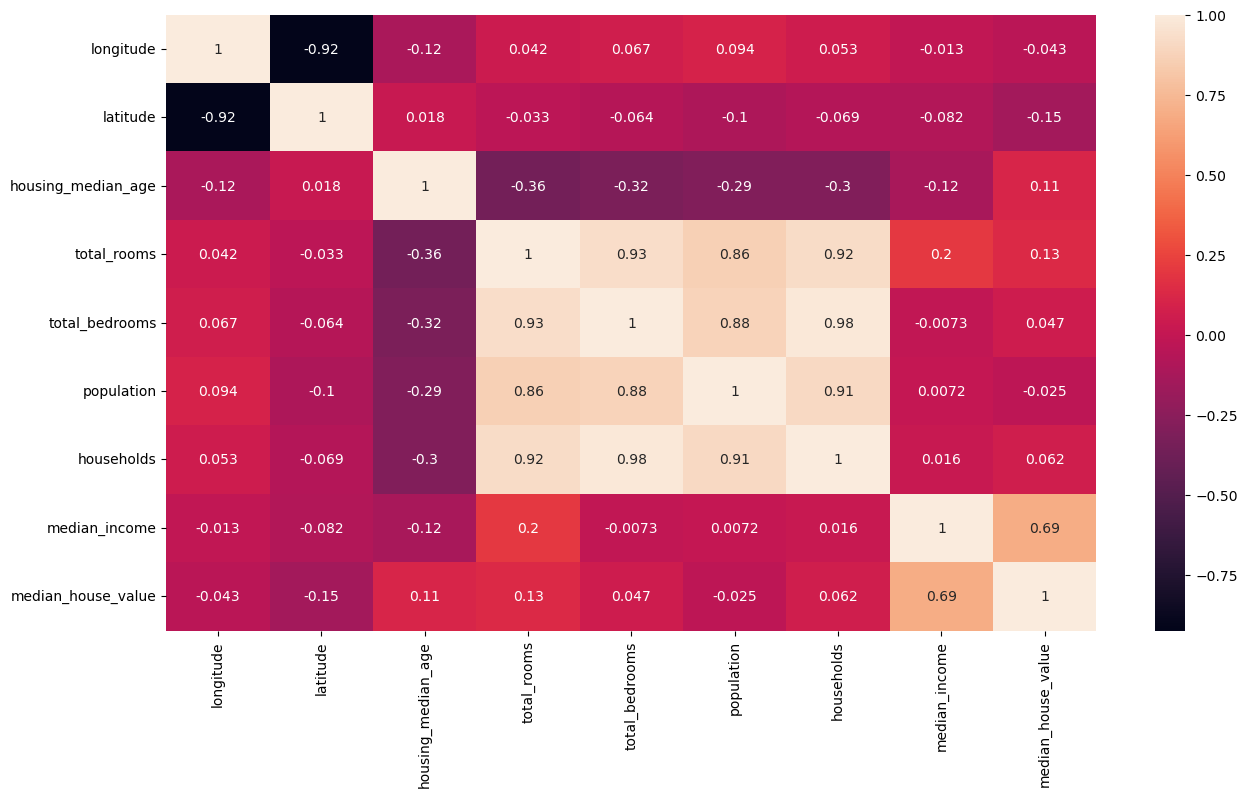

In [15]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(train_data.corr(numeric_only=True), annot=True, square=False)

In [16]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

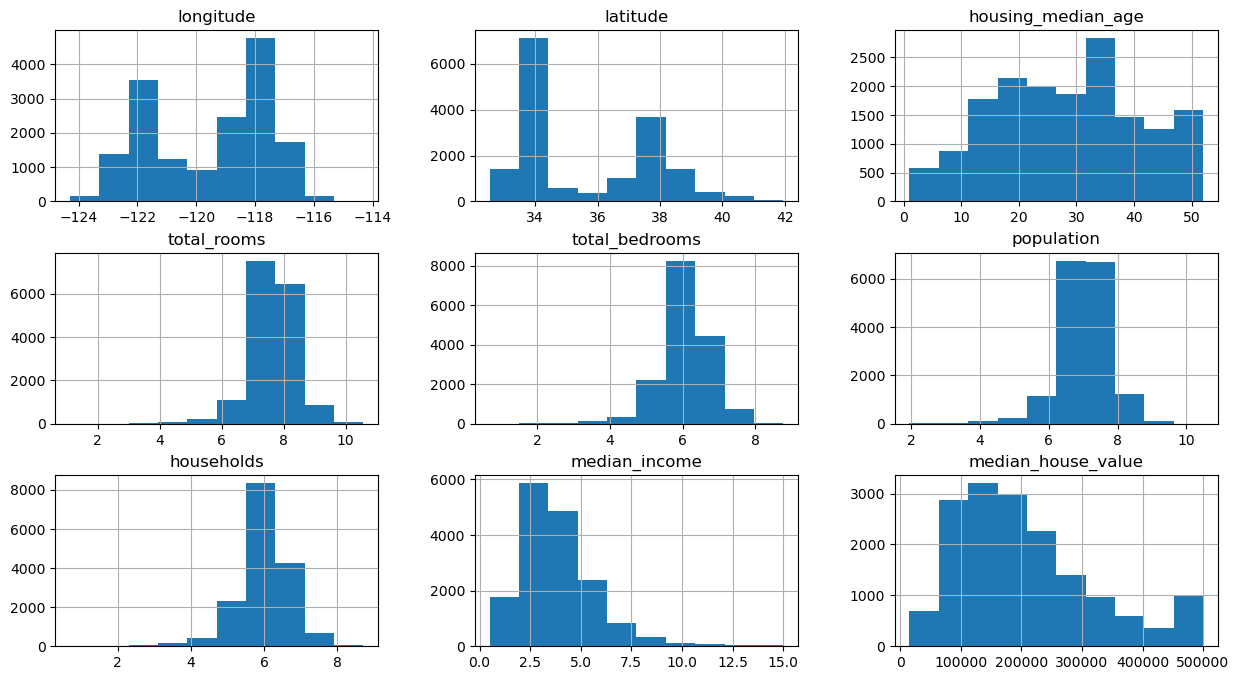

In [17]:
train_data.hist(figsize=(15, 8))

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

<Axes: xlabel='latitude', ylabel='longitude'>

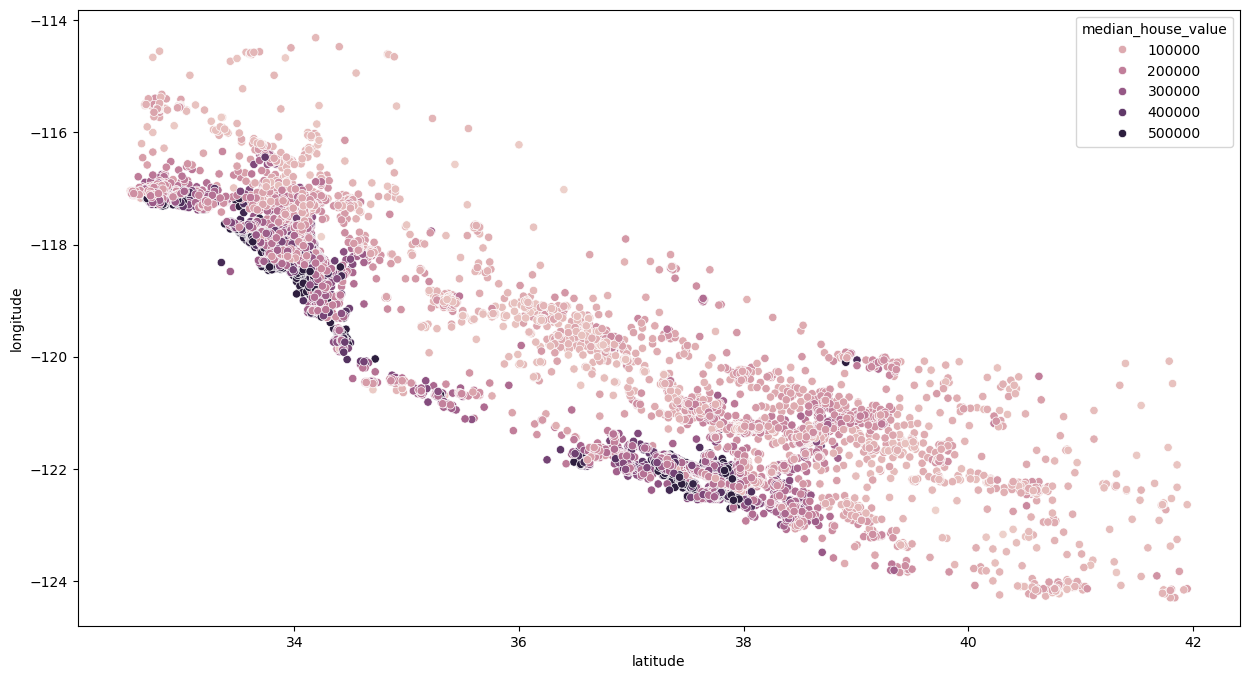

In [19]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value")

<Axes: >

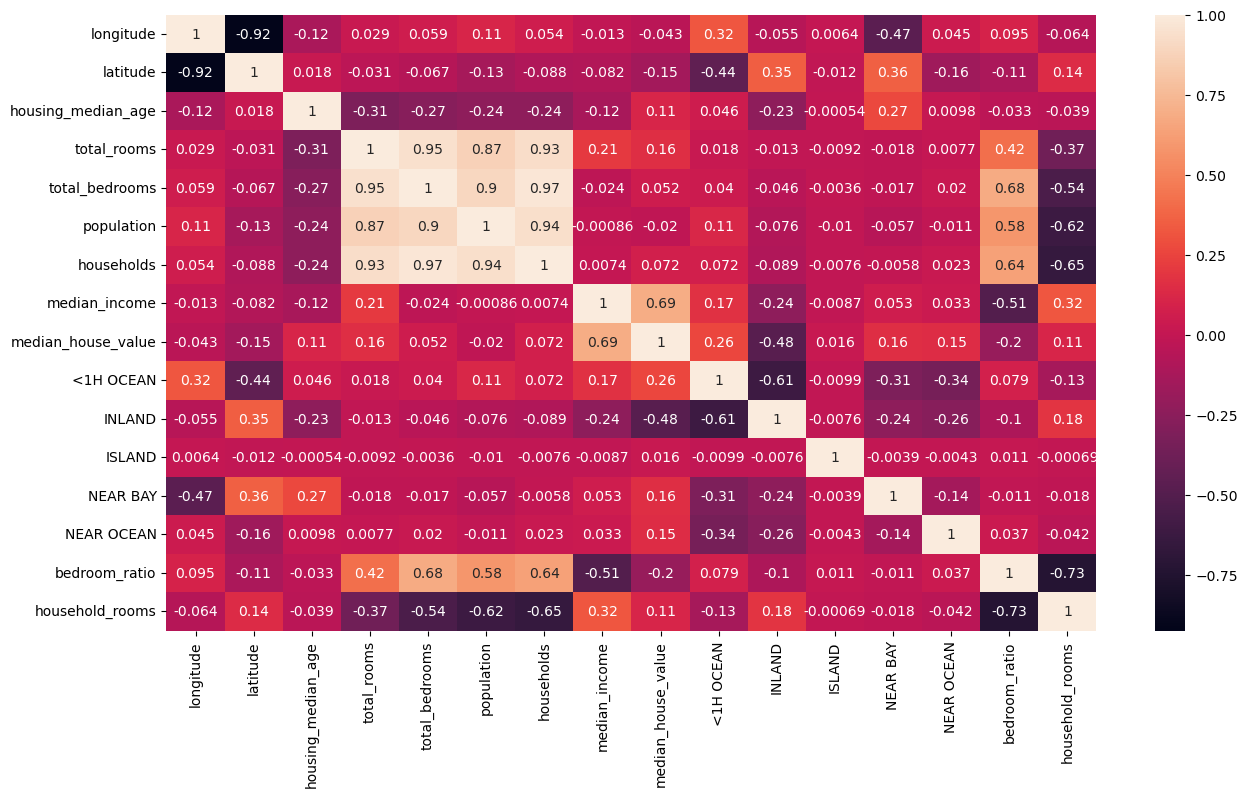

In [20]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(train_data.corr(numeric_only=True), annot=True, square=False)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)
test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [23]:
X_test, y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]

In [24]:
X_test_s = scaler.transform(X_test)

In [25]:
reg.score(X_test_s, y_test)

0.6812994109484076

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test_s, y_test)

0.824555067964808

In [42]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    "max_depth": [None, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
    "n_jobs": [-1]
}

grid_search = RandomizedSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 4, 8, 12, 16, 20,
                                                      24, 28, 32, 36, 40],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'n_jobs': [-1]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
best_forest = grid_search.best_estimator_

In [44]:
best_forest.score(X_test_s, y_test)

0.8264258772222878